# Fractal Dimension (State Space)

This notebook covers Fractal Dimension measures that work in state space, including:
- Correlation Dimension

In [1]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import correlation_dimension
from apm.methods.settings import CD_PARAMS
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import EXT, COLORS
from apm.sim.examples import get_examples, check_examples
from apm.sim.defs import N_SIMS2 as N_SIMS
from apm.sim.defs import SIM_ITERS

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Set the random seed
set_random_seed(111)

In [5]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / '23_fractaldim'

In [6]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

In [7]:
# Define collection of example signals
examples = get_examples()

## Correlation Dimension

The correlation dimension is a measure of the dimensionality of the space of a set of points. 

Correlation dimension is generally considered to be a type of fractal dimension measure.

In [8]:
# Check correlation dimension measure parameters
print(CD_PARAMS)

{'delay': 4, 'dimension': 20}


### Calculate Correlation Dimension on Example Signals

In [9]:
# Check the correlation dimension values across some example signals
check_examples(examples, correlation_dimension, CD_PARAMS, 'correlation dimension')

Computed correlation dimension:
  powerlaw       : 	 14.2760
  synaptic       : 	 15.0800
  knee           : 	 10.0361
  oscillation    : 	 1.2896
  burst          : 	 0.6142
  combined       : 	 13.1042
  comb_burst     : 	 13.8552
  comb_peak      : 	 12.2803


### Correlation Dimension: Aperiodic Measures

In [10]:
# Run simulations calculating correlation dimension across exponents
cd_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], correlation_dimension, CD_PARAMS, N_SIMS)

In [11]:
# Run simulations calculating correlation dimension across exponents with an oscillation
cd_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], correlation_dimension, CD_PARAMS, N_SIMS)

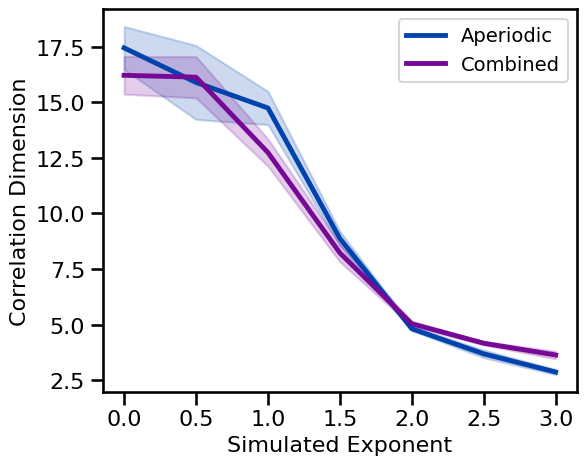

In [12]:
# Plot correlation dimension estimates across aperiodic variations
plot_ap_sims(cd_sims_exp, cd_sims_comb, 'Correlation Dimension',
             save_fig=SAVE_FIG, file_name='cd_ap' + EXT, file_path=FIGPATH)

### Correlation Dimension: Periodic Variations

In [13]:
# Run simulations calculating correlation dimension across oscillation frequency
cd_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], correlation_dimension, CD_PARAMS, N_SIMS)

In [14]:
# Run simulations calculating correlation dimension across oscillation power
cd_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], correlation_dimension, CD_PARAMS, N_SIMS)

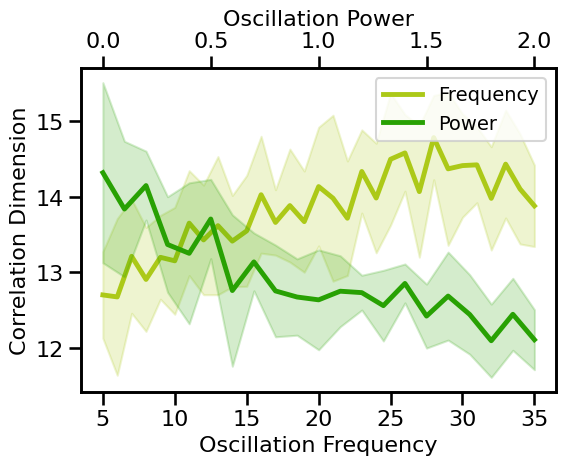

In [15]:
# Plot correlation dimension estimates across periodic variations
plot_pe_sims(cd_sims_freq, cd_sims_pow, 'Correlation Dimension', 
             save_fig=SAVE_FIG, file_name='cd_pe' + EXT, file_path=FIGPATH)

### Correlation Dimension: Knee Variations

In [16]:
# Run simulations calculating correlation dimension across timescales
cd_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], correlation_dimension, CD_PARAMS, N_SIMS)

In [17]:
# Run simulations calculating correlation dimension across peak bandwidths (sims from file)
cd_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', correlation_dimension, CD_PARAMS, N_SIMS)

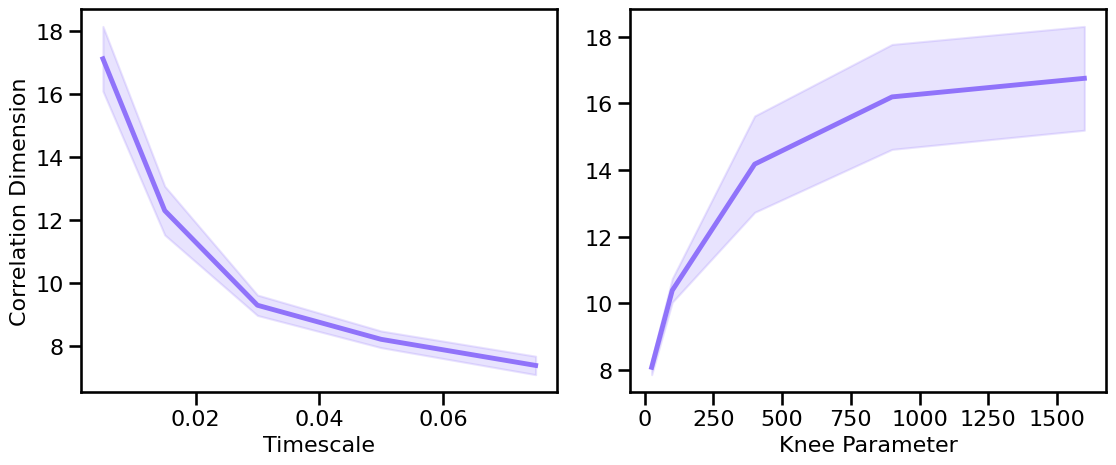

In [18]:
# Plot the estimated correlation dimension across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, cd_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, cd_sims_knee, 'Knee Parameter',
              ylabel='Correlation Dimension', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='cd_kn_vars' + EXT, file_path=FIGPATH)

### Correlation Dimension: Peak Variations

In [19]:
# Run simulations calculating correlation dimension across peak bandwidths (sims from file)
cd_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', correlation_dimension, CD_PARAMS, N_SIMS)

In [20]:
# Run simulations calculating correlation dimension across burst probabilities
cd_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], correlation_dimension, CD_PARAMS, N_SIMS)

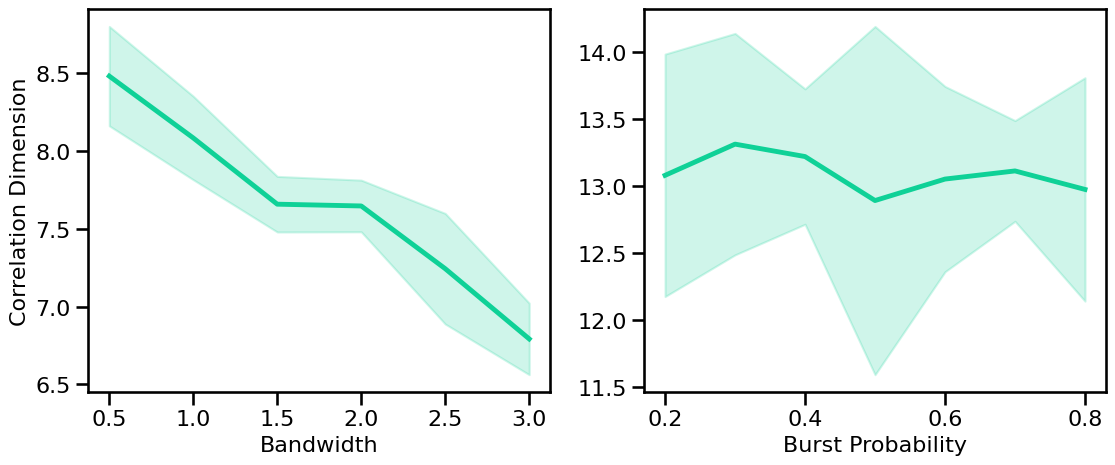

In [21]:
# Plot the estimated correlation dimension across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, cd_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, cd_sims_burst, 'Burst Probability',
              ylabel='Correlation Dimension', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='cd_pe_vars' + EXT, file_path=FIGPATH)

# Conclusions

Correlation dimension:
- generally decreases with increasing aperiodic exponent
- is broadly consistent across variations of oscillation frequency and power